In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

# Summary

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV. 

We'll do this by downloading it one month at a time, and then combining all the months together.

Load the 2012 dataset and Plot the temperature over time

# 5.1 Downloading one month of weather data

When playing with the cycling data, I wanted temperature and precipitation data to find out if people like biking when it's raining. So I went to the site for [Canadian historical weather data](http://climate.weather.gc.ca/index_e.html#access), and figured out how to get it automatically.

Here we're going to get the data for March 2012, and clean it up

Here's an URL template you can use to get data in Montreal. 
Note from your favorite teacher : the link is broken. Figure out how to adapt it the new schema. Go on the website and search. Check that you use the same stationId as the template below 

In [2]:
#url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"


To get the data for March 2013, we need to format it with `month=3, year=2012`.

In [33]:
#url = url_template.format(month=3, year=2013)
#weather_mar2012 = pd.read_csv(url, skiprows=19, index_col='Date/Time', parse_dates=True, encoding='latin1', header=True)

In [2]:
df = pd.read_csv('../data/weather_2012.csv', encoding='utf-8', sep=',', parse_dates=['Date/Time'])
df.head()

,Date/Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


This is super great! We can just use the same `read_csv` function as before, and just give it a URL as a filename. Awesome.

plot the dataframe using head or classical indexing `df[:5]`

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE89863DA0>,
      dtype=object)

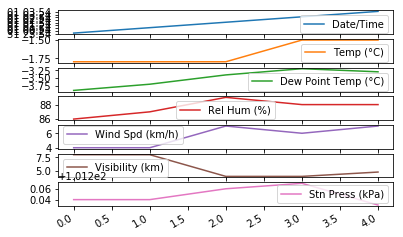

In [3]:
df[:5].plot(subplots = True)

Plot the temperatur column The unicode caracter for ° is \xb0C

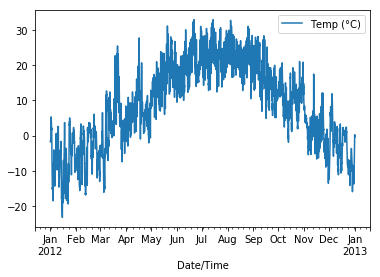

In [4]:
df.plot(x='Date/Time', y='Temp (\xb0C)')

Notice how it goes up to 25° C in the middle there? That was a big deal. It was March, and people were wearing shorts outside. 

And I was out of town and I missed it. Still sad, humans.

I had to write `'\xb0'` for that degree character °. Let's fix up the columns by renaming them. We're going to just print them out, copy, and fix them up by hand.

In [5]:
select_col = ['Date/Time', 'Temp (\xb0C)']
df = df[select_col]
df.head()
#name_conversion = {'Date/Time' : 'date et heure', 'Temp (C)' : 'Temperature'}
#df = df.rename(columns = name_conversion)
#df

,Date/Time,Temp (°C)
0,2012-01-01 00:00:00,-1.8
1,2012-01-01 01:00:00,-1.8
2,2012-01-01 02:00:00,-1.8
3,2012-01-01 03:00:00,-1.5
4,2012-01-01 04:00:00,-1.5


You may notice that there are a few columns which are are either entirely empty or only have a few values in them. Let's get rid of all of those with `dropna`.

The argument `axis=1` to `dropna` means "drop columns", not rows", and `how='any'` means "drop the column if any value is null". 



In [6]:
df.dropna(axis = 0) #supprime les lignes avec na
df.dropna(axis = 1) #supprime les colonnes avec na
df.head()

,Date/Time,Temp (°C)
0,2012-01-01 00:00:00,-1.8
1,2012-01-01 01:00:00,-1.8
2,2012-01-01 02:00:00,-1.8
3,2012-01-01 03:00:00,-1.5
4,2012-01-01 04:00:00,-1.5


The Year/Month/Day/Time columns are redundant, though, and the Data Quality column doesn't look too useful. Let's get rid of those.

The `axis=1` argument means "Drop columns", like before. The default for operations like `dropna` and `drop` is always to operate on rows.

In [7]:
df1 = df.set_index('Date/Time')
df1.head()

,Temp (°C)
Date/Time,
2012-01-01 00:00:00,-1.8
2012-01-01 01:00:00,-1.8
2012-01-01 02:00:00,-1.8
2012-01-01 03:00:00,-1.5
2012-01-01 04:00:00,-1.5


In [8]:
daily = df1.resample(rule = 'D').mean()
daily.head()

,Temp (°C)
Date/Time,
2012-01-01,0.629167
2012-01-02,0.041667
2012-01-03,-14.416667
2012-01-04,-13.645833
2012-01-05,-6.750000


Awesome! We now only have the relevant columns, and it's much more manageable.

# 5.2 Plotting the temperature by hour of day

By using Groupby plot the median temperature by hour of day

In [9]:
df2 = df.groupby(['Date/Time']).mean()
df2.head()

,Temp (°C)
Date/Time,
2012-01-01 00:00:00,-1.8
2012-01-01 01:00:00,-1.8
2012-01-01 02:00:00,-1.8
2012-01-01 03:00:00,-1.5
2012-01-01 04:00:00,-1.5


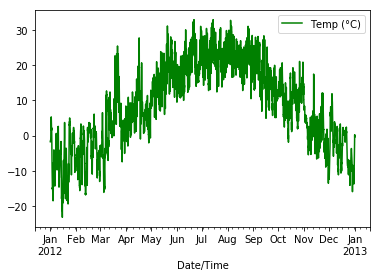

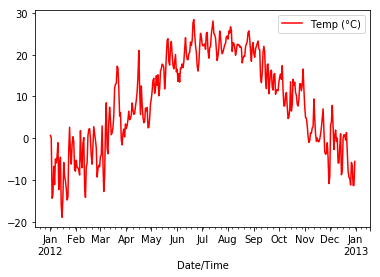

In [10]:
df2.plot(c = 'g') # température heure par heure
daily.plot(c = 'r') #moyenne des température journalière

So it looks like the time with the highest median temperature is 2pm.

# 5.3 Getting the whole year of data

Okay, so what if we want the data for the whole year? Ideally the API would just let us download that, but I couldn't figure out a way to do that.

First, let's put our work from above into a function that gets the weather for a given month. 



In [42]:
monthly = df.set_index('Date/Time')
#monthly

In [43]:

janvier = monthly['2012-01-01':'2012-01-31']
janvier#.head() 
fevrier = monthly['2012-02-01':'2012-02-29'] 
mars = monthly['2012-03-01':'2012-03-31']
avril = monthly['2012-04-01':'2012-04-30']
mai = monthly['2012-05-01':'2012-05-31']
juin = monthly['2012-06-01':'2012-06-30']
juillet = monthly['2012-01-01':'2012-07-31']
aout = monthly['2012-08-01':'2012-08-31']
septembre = monthly['2012-09-01':'2012-09-30'] 
octobre = monthly['2012-10-01':'2012-10-31']
novembre = monthly['2012-11-01':'2012-11-30']
decembre = monthly['2012-09-01':'2012-09-30']


Test that it does the right thing

In [44]:
pd.concat([janvier.plot(x=None, y='Temp (\xb0C)', fevrier.plot(x=None, y='Temp (\xb0C)'])

SyntaxError: invalid syntax (<ipython-input-44-019f027e034b>, line 1)

Now we can get all the months at once. This will take a little while to run.

Once we have this, it's easy to concatenate all the dataframes together into one big dataframe using `pd.concat`. Concat all months in one dataframe

Plot everything 

# 5.4 Saving to a CSV

It's slow and unnecessary to download the data every time, so let's save our dataframe for later use!